In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [235]:
data = pd.read_csv("Downloads/data_amcd.csv")
data.drop("Title", axis=1, inplace=True)
data['Price'] = data['Price'].apply(lambda x: float(x[:-1]))
data['Summary rating'] = data['Summary rating'].apply(lambda x: int(x[:-3]))

data

,Index,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
0,A,2,4.32,236,Crime,8,2022,French,Yes,24.00
1,B,5,4.05,416,Auto-biographical,8,2007,French,Yes,7.90
2,C,2,4.31,65,Auto-biographical,9,2017,French,Yes,3.90
3,D,9,4.32,352,Mystery / Thriller,7,2023,American,Yes,27.17
4,E,10,3.69,176,Adventure,7,2019,French,Yes,7.80
5,F,10,4.15,1392,Historical fiction,6,1869,Russian,No,10.20
6,G,10,3.74,319,Crime / Mystery,7,2007,English,Yes,7.70
7,H,9,3.28,138,Historical fiction,8,1979,French,Yes,4.90
8,I,24,4.69,712,Essay,9,1985,American,Yes,24.24
9,J,34,3.94,1925,Dystopia,6,2009,Japanese,No,30.30


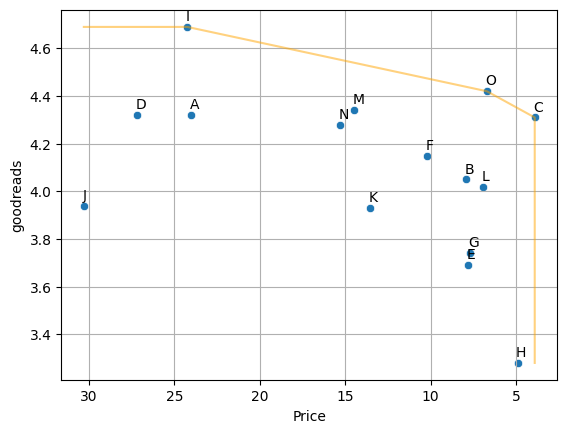

In [236]:
fig, ax = plt.subplots()
sns.scatterplot(data, x='Price', y='goodreads', ax=ax)

for i, txt in enumerate(names):
    ax.annotate(text=txt, xy=(data['Price'][i], data['goodreads'][i]), xytext=(data['Price'][i]+np.mean(data['Price'])/150, data['goodreads'][i]+np.mean(data['goodreads'])/150))


plt.plot([max(data['Price']), data['Price'][8], data['Price'][14], data['Price'][2], data['Price'][2]], [data['goodreads'][8], data['goodreads'][8], data['goodreads'][14], data['goodreads'][2], min(data['goodreads'])],alpha=.5, c='orange')
plt.gca().invert_xaxis()
plt.grid()

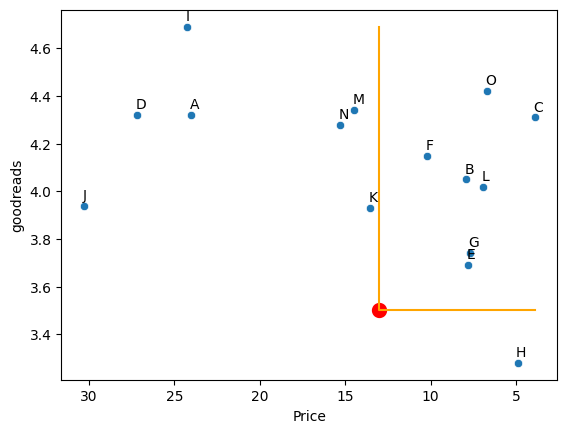

In [237]:
fig, ax = plt.subplots()
sns.scatterplot(data, x='Price', y='goodreads', ax=ax)

for i, txt in enumerate(names):
    ax.annotate(text=txt, xy=(data['Price'][i], data['goodreads'][i]), xytext=(data['Price'][i]+np.mean(data['Price'])/150, data['goodreads'][i]+np.mean(data['goodreads'])/150))


# plt.plot([max(data['Price']), data['Price'][8], data['Price'][14], data['Price'][2], data['Price'][2]], [data['goodreads'][8], data['goodreads'][8], data['goodreads'][14], data['goodreads'][2], min(data['goodreads'])],alpha=.5, c='orange')

ideal = (13, 3.5)

plt.plot([ideal[0], ideal[0], min(data.Price)], [max(data.goodreads), ideal[1], ideal[1]], color='orange')
plt.scatter([ideal[0]], [ideal[1]], color='red', linewidth=5)

plt.gca().invert_xaxis()
# plt.grid()

In [254]:
normalized_data = data.copy(deep=True)
normalized_data = normalized_data[normalized_data.Index.isin(["O", "C", "F", "B", "L", "G", "E"])]


normalized_data.Genra = normalized_data.Genra.apply(lambda x: 3 if 'Historical' in x
                                                    else 2 if ("Cri" or "Thr" or "Mys" or "Aut") in x
                                                    else 1 if ("Ess" or "Pla") in x
                                                    else 0)

normalized_data.Nationality = normalized_data.Nationality.apply(lambda x: 0 if x == "French" else 1)
normalized_data['CanRead?'] = normalized_data['CanRead?'].apply(lambda x: 0 if x == "No" else 1)

normalized_data

,Index,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
1,B,5,4.05,416,0,8,2007,0,1,7.9
2,C,2,4.31,65,0,9,2017,0,1,3.9
4,E,10,3.69,176,0,7,2019,0,1,7.8
5,F,10,4.15,1392,3,6,1869,1,0,10.2
6,G,10,3.74,319,2,7,2007,1,1,7.7
11,L,20,4.02,160,1,8,2006,0,1,6.9
14,O,10,4.42,189,3,8,2006,0,1,6.7


In [255]:
normalized_data['# pages'] = normalized_data['# pages'].apply(lambda x: max(normalized_data['# pages']) - x)
normalized_data['Year'] = normalized_data['Year'].apply(lambda x: max(normalized_data['Year']) - x)
normalized_data['Price'] = normalized_data['Price'].apply(lambda x: max(normalized_data['Price']) - x)
normalized_data['# written publications'] = normalized_data['# written publications'].apply(lambda x: max(normalized_data['# written publications']) - x)

normalized_data = normalized_data.drop("Index", axis=1)/normalized_data.drop("Index", axis=1).sum()
normalized_data.insert(0, 'Index', data['Index'])
normalized_data.reset_index(inplace=True, drop=True)
normalized_data

,Index,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
0,B,0.205479,0.142706,0.138893,0.000000,0.150943,0.059406,0.0,0.166667,0.113300
1,C,0.246575,0.151868,0.188843,0.000000,0.169811,0.009901,0.0,0.166667,0.310345
2,E,0.136986,0.130021,0.173047,0.000000,0.132075,0.000000,0.0,0.166667,0.118227
3,F,0.136986,0.146230,0.000000,0.333333,0.113208,0.742574,0.5,0.000000,0.000000
4,G,0.136986,0.131783,0.152697,0.222222,0.132075,0.059406,0.5,0.166667,0.123153
5,L,0.000000,0.141649,0.175324,0.111111,0.150943,0.064356,0.0,0.166667,0.162562
6,O,0.136986,0.155743,0.171197,0.333333,0.150943,0.064356,0.0,0.166667,0.172414


In [437]:
pd.DataFrame(normalized_data.Index).T

,0,1,2,3,4,5,6
Index,B,C,E,F,G,L,O


In [256]:
normalized_data.iloc[1,2]

0.15186751233262863

In [257]:
weights = [2, 10, 3, 7, 7, 2, 4, 6, 5]
scores = []
for i, row in normalized_data.iterrows():
    tot = 0
    for i, val in enumerate(row.values):
        if i == 0: continue
        tot += weights[i-1] * val
    print(tot)
    scores.append(tot)
normalized_data['Scores'] = scores

normalized_data[['Index', 'Scores']].sort_values('Scores', ascending=False).T

4.9966168584056785
6.338560273704874
4.608985784275645
8.347204673643175
8.2645515689565
5.71836404441673
7.725716796597397


,3,4,6,1,5,0,2
Index,F,G,O,C,L,B,E
Scores,8.347205,8.264552,7.725717,6.33856,5.718364,4.996617,4.608986


In [258]:
reset_data = normalized_data.drop(["Index", "Scores"], axis=1)
reset_data

,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
0,0.205479,0.142706,0.138893,0.000000,0.150943,0.059406,0.0,0.166667,0.113300
1,0.246575,0.151868,0.188843,0.000000,0.169811,0.009901,0.0,0.166667,0.310345
2,0.136986,0.130021,0.173047,0.000000,0.132075,0.000000,0.0,0.166667,0.118227
3,0.136986,0.146230,0.000000,0.333333,0.113208,0.742574,0.5,0.000000,0.000000
4,0.136986,0.131783,0.152697,0.222222,0.132075,0.059406,0.5,0.166667,0.123153
5,0.000000,0.141649,0.175324,0.111111,0.150943,0.064356,0.0,0.166667,0.162562
6,0.136986,0.155743,0.171197,0.333333,0.150943,0.064356,0.0,0.166667,0.172414


In [259]:
reset_data["Year"][0]

0.0594059405940594

# Electre I

In [268]:
concordance = np.zeros((7, 7))
concordance
for i in range(len(concordance)):
    for j in range(len(concordance)):
        if i == j: continue
        sum_weights = 0
        for n, criterion in enumerate(reset_data):
            if reset_data[criterion][i] >= reset_data[criterion][j]:
                sum_weights += weights[n]
        concordance[i][j] = sum_weights

print(concordance)
print(np.max(concordance))
concordance = concordance/np.max(concordance)

[[ 0. 19. 38. 23. 27. 29. 19.]
 [44.  0. 46. 33. 33. 37. 27.]
 [25. 17.  0. 23. 18. 12. 15.]
 [23. 13. 25.  0. 25. 25. 15.]
 [27. 19. 43. 27.  0. 19. 12.]
 [34. 19. 44. 21. 33.  0. 22.]
 [44. 29. 43. 40. 42. 43.  0.]]
46.0


In [269]:
discordance = np.zeros((7, 7))
discordance
for i in range(len(discordance)):
    for j in range(len(discordance)):
        if i == j: continue
        diff = 0
        for n, criterion in enumerate(reset_data):
            diff = max(diff, reset_data[criterion][j] - reset_data[criterion][i])
        discordance[i][j] = diff

print(np.round(discordance, decimals=4))
print(np.max(discordance))
discordance = discordance/np.max(discordance)

[[0.     0.197  0.0342 0.6832 0.5    0.1111 0.3333]
 [0.0495 0.     0.     0.7327 0.5    0.1111 0.3333]
 [0.0685 0.1921 0.     0.7426 0.5    0.1111 0.3333]
 [0.1667 0.3103 0.173  0.     0.1667 0.1753 0.1724]
 [0.0685 0.1872 0.0204 0.6832 0.     0.0394 0.1111]
 [0.2055 0.2466 0.137  0.6782 0.5    0.     0.2222]
 [0.0685 0.1379 0.0019 0.6782 0.5    0.0041 0.    ]]
0.7425742574257426


In [279]:
concordance

array([[0.        , 0.41304348, 0.82608696, 0.5       , 0.58695652,
        0.63043478, 0.41304348],
       [0.95652174, 0.        , 1.        , 0.7173913 , 0.7173913 ,
        0.80434783, 0.58695652],
       [0.54347826, 0.36956522, 0.        , 0.5       , 0.39130435,
        0.26086957, 0.32608696],
       [0.5       , 0.2826087 , 0.54347826, 0.        , 0.54347826,
        0.54347826, 0.32608696],
       [0.58695652, 0.41304348, 0.93478261, 0.58695652, 0.        ,
        0.41304348, 0.26086957],
       [0.73913043, 0.41304348, 0.95652174, 0.45652174, 0.7173913 ,
        0.        , 0.47826087],
       [0.95652174, 0.63043478, 0.93478261, 0.86956522, 0.91304348,
        0.93478261, 0.        ]])

In [408]:
# np.array(list(map(lambda x: x if x>.6 else 0, concordance)))

over_concordance = np.where(concordance > .9, 1, 0)

In [409]:
over_discordance = np.where(discordance < .2, 1, 0)

In [410]:
adjacency = np.where(over_concordance + over_discordance == 2, 1, 0)
adjacency

array([[0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0]])

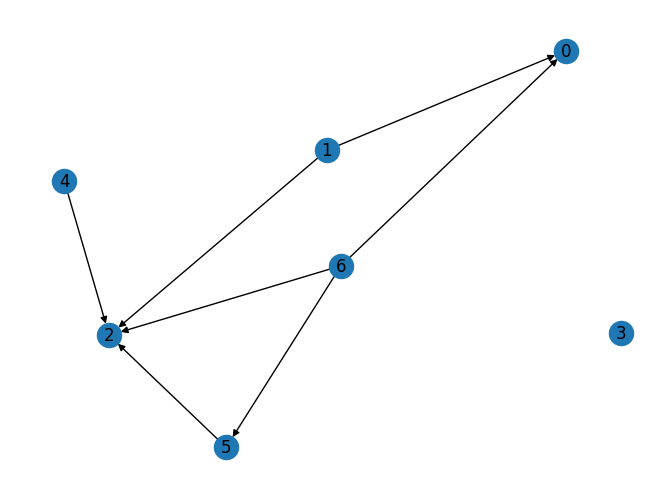

In [416]:
import networkx as nx


options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

G = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)

pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
nx.draw(G,pos, with_labels=True)



# nx.draw_networkx(G, arrows=True)

# Electre II

In [430]:
c_plus, c_zero, c_minus = .95, .65, .35
d1, d2 = .65, .45

In [431]:
over_c_plus = np.where(concordance > c_plus, 1, 0)
over_c_zero = np.where(concordance > c_zero, 1, 0)
over_c_minus = np.where(concordance > c_minus, 1, 0)

under_d1 = np.where(discordance < d1, 1, 0)
under_d2 = np.where(discordance < d2, 1, 0)

surclassement_fort = np.bitwise_or(np.where(over_c_plus + under_d1 == 2, 1, 0), np.where(over_c_zero + under_d2 == 2, 1, 0))
surclassement_faible = np.where(over_c_minus + under_d1 == 2, 1, 0)

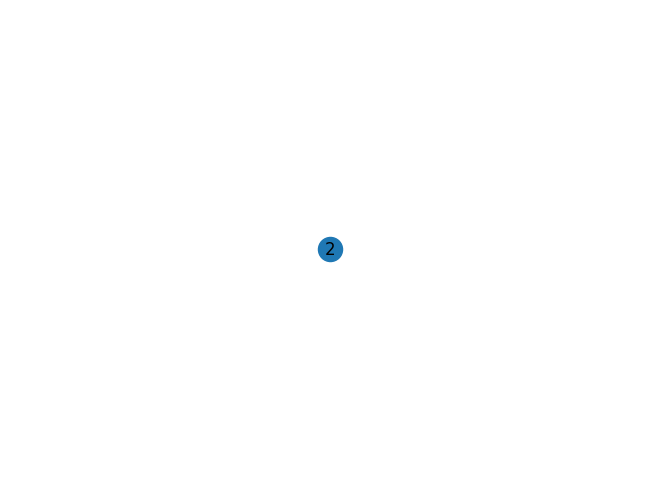

In [445]:
graphe_surclassement_fort = nx.from_numpy_array(surclassement_fort, create_using=nx.DiGraph)
graphe_surclassement_fort.remove_node(3)
graphe_surclassement_fort.remove_node(1)
graphe_surclassement_fort.remove_node(6)
graphe_surclassement_fort.remove_node(4)
graphe_surclassement_fort.remove_node(5)
graphe_surclassement_fort.remove_node(0)

pos = nx.spring_layout(graphe_surclassement_fort, scale=20, k=3/np.sqrt(graphe_surclassement_fort.order()))
nx.draw(graphe_surclassement_fort,pos, with_labels=True)

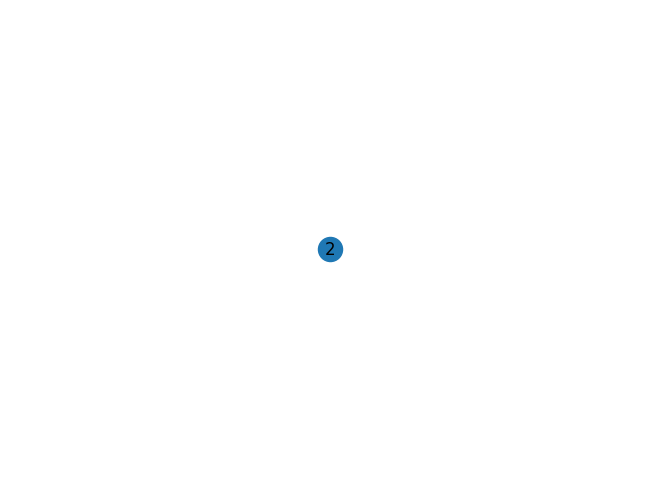

In [446]:
graphe_surclassement_faible = nx.from_numpy_array(surclassement_faible, create_using=nx.DiGraph)
graphe_surclassement_faible.remove_node(3)
graphe_surclassement_faible.remove_node(1)
graphe_surclassement_faible.remove_node(6)
graphe_surclassement_faible.remove_node(4)
graphe_surclassement_faible.remove_node(5)
graphe_surclassement_faible.remove_node(0)

pos = nx.spring_layout(graphe_surclassement_faible, scale=20, k=3/np.sqrt(graphe_surclassement_faible.order()))
nx.draw(graphe_surclassement_faible,pos, with_labels=True)

# TOPSIS
[wikipedia article for the TOPSIS method](https://en.wikipedia.org/wiki/TOPSIS)

In [472]:
normalized_data_topsis = normalized_data.drop(["Index", "Scores"], axis=1)
normalized_data_topsis

,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
0,0.205479,0.142706,0.138893,0.000000,0.150943,0.059406,0.0,0.166667,0.113300
1,0.246575,0.151868,0.188843,0.000000,0.169811,0.009901,0.0,0.166667,0.310345
2,0.136986,0.130021,0.173047,0.000000,0.132075,0.000000,0.0,0.166667,0.118227
3,0.136986,0.146230,0.000000,0.333333,0.113208,0.742574,0.5,0.000000,0.000000
4,0.136986,0.131783,0.152697,0.222222,0.132075,0.059406,0.5,0.166667,0.123153
5,0.000000,0.141649,0.175324,0.111111,0.150943,0.064356,0.0,0.166667,0.162562
6,0.136986,0.155743,0.171197,0.333333,0.150943,0.064356,0.0,0.166667,0.172414


In [481]:
normalized_data_topsis = normalized_data_topsis * weights / sum(weights)
normalized_data_topsis

,# written publications,goodreads,# pages,Genra,Summary rating,Year,Nationality,CanRead?,Price
0,0.000388,0.006744,0.000591,0.000000,0.003495,0.000112,0.000000,0.002836,0.001339
1,0.000466,0.007177,0.000803,0.000000,0.003932,0.000019,0.000000,0.002836,0.003667
2,0.000259,0.006145,0.000736,0.000000,0.003058,0.000000,0.000000,0.002836,0.001397
3,0.000259,0.006911,0.000000,0.007719,0.002622,0.001404,0.003781,0.000000,0.000000
4,0.000259,0.006228,0.000649,0.005146,0.003058,0.000112,0.003781,0.002836,0.001455
5,0.000000,0.006694,0.000746,0.002573,0.003495,0.000122,0.000000,0.002836,0.001921
6,0.000259,0.007360,0.000728,0.007719,0.003495,0.000122,0.000000,0.002836,0.002037


In [482]:
ideal_action = pd.DataFrame(np.max(normalized_data_topsis.values, axis=0)).T
ideal_action

,0,1,2,3,4,5,6,7,8
0,0.000466,0.00736,0.000803,0.007719,0.003932,0.001404,0.003781,0.002836,0.003667


In [483]:
anti_ideal_action = pd.DataFrame(np.min(normalized_data_topsis.values, axis=0)).T
anti_ideal_action

,0,1,2,3,4,5,6,7,8
0,0.0,0.006145,0.0,0.0,0.002622,0.0,0.0,0.0,0.0


In [500]:
ideal_distance = np.array([np.linalg.norm(action-ideal_action.values) for action in normalized_data_topsis.values])
anti_ideal_distance = np.array([np.linalg.norm(action-anti_ideal_action.values) for action in normalized_data_topsis.values])
similarity = anti_ideal_distance / (anti_ideal_distance + ideal_distance)
similarity

array([0.27268124, 0.36535966, 0.26467874, 0.64053587, 0.64757808,
       0.39644464, 0.665621  ])

In [502]:
pd.DataFrame(data={'ideal_distance': ideal_distance,
                   'anti_ideal_distance': anti_ideal_distance,
                   'similarity': similarity,
                   'index': normalized_data.Index}).sort_values('similarity', ascending=False)

,ideal_distance,anti_ideal_distance,similarity,index
6,0.004340,0.008639,0.665621,O
4,0.003910,0.007186,0.647578,G
3,0.004908,0.008746,0.640536,F
5,0.006806,0.004471,0.396445,L
1,0.008708,0.005013,0.365360,C
0,0.009032,0.003386,0.272681,B
2,0.009126,0.003285,0.264679,E


In [494]:
np.linalg.norm(normalized_data_topsis.values-np.repeat(ideal_action.values, repeats=7, axis=0))

0.018580657920463626

In [491]:
normalized_data_topsis.values.shape

(7, 9)

In [492]:
ideal_action.values.shape

(1, 9)

In [495]:
np.repeat(ideal_action.values, repeats=7, axis=0).shape

(7, 9)